In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [3]:
# Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')   # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')     # testing data
y_train = dftrain.pop('survived')   # pops a whole column into y_train
y_eval = dfeval.pop('survived')
# print(dftrain.loc[0], y_train.loc[0])   # locate the row in dataframe
# print(dftrain['age'])

In [4]:
dftrain.head()  # gives back first 5 rows of data frame for you to check if data is in correct format

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
dftrain.describe()  # gives back relevant data like standard deviation, mean, max and min, etc.

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [6]:
dftrain.shape   # just like with tensors

(627, 9)

In [7]:
print(dftrain.loc[5])   # returns all the data at a given row with column labels specified
print(y_train.loc[5])

sex                          male
age                           2.0
n_siblings_spouses              3
parch                           1
fare                       21.075
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 5, dtype: object
0


In [8]:
y_train.head()  # also gives back first 5 rows for us to check if the format of data is right

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [9]:
y_train.describe()

count    627.000000
mean       0.387560
std        0.487582
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

<AxesSubplot:>

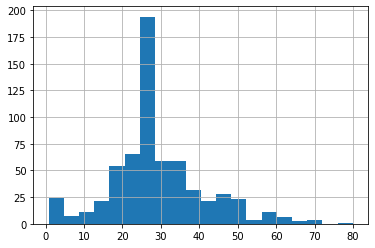

In [10]:
dftrain.age.hist(bins=20)   # makes a histogram of age column and classifies data into 20 bins

<AxesSubplot:>

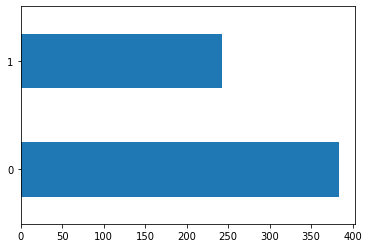

In [11]:
# y_train.hist()  # only has one column

## This code here is if we want to add labels to our barh graph
# test = y_train.value_counts().plot(kind='barh')
# test.set_xlabel('No. of people')
# test.set_ylabel('Survived')
# print(test)   # print can be omitted here

y_train.value_counts().plot(kind='barh')    # kind defines which kind of histogram to use (better way for binary values than above)

<AxesSubplot:>

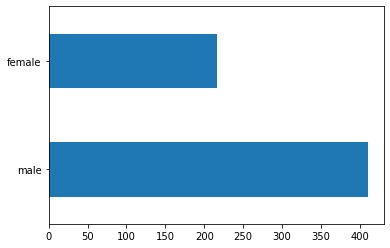

In [12]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

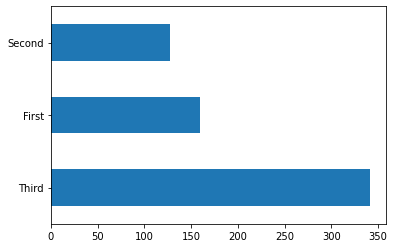

In [13]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

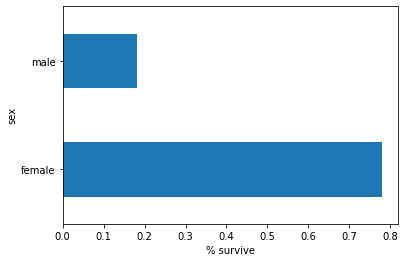

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')